In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn import datasets, linear_model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [126]:
df=pd.read_csv("/home/buluag/msc/oda_onerisi.csv", header= 0, encoding= 'unicode_escape')

## Örnek veri

In [127]:
df.head()

,gelir,egitim,evli_bekar,cocuk_sayisi,yas,cinsiyet,mevsim,yerli_yabanci,kalinan_gun_sayisi,oda_tipi
0,10000,lisans,evli,2,35,kadin,yaz,yerli,1,standart
1,90000,lisans,bekar,0,18,erkek,ilkbahar,yerli,4,delux
2,15000,master,evli,1,45,kadin,yaz,yerli,7,suit
3,20000,lise,bekar,0,22,kadin,yaz,yabanci,7,suit
4,40000,lise,evli,2,27,erkek,yaz,yerli,14,suit


## Tanımlayıcı İstatistikler

Otelde kalan misafirlerin bilgilerine göre bazı istatistikler tutulmuştur. Örneğin misafirler otelde ortalama 8 gün konaklamaktadırlar. maksimum kalınan gün sayısı ise 21'dir. Otelde kalan misafirlerin gelir istatistikleri tutularak ise oda ve alınan hizmetler için fiyat belirlemesi yapılabilir. Otele gelen çocuk sayısı ve yaş ortalasına göre oteldeki aktiviteler belirlenebilir.

In [128]:
df.describe()

,gelir,cocuk_sayisi,yas,kalinan_gun_sayisi
count,30.000000,30.000000,30.000000,30.000000
mean,24135.866667,1.466667,37.333333,8.533333
std,17044.052818,1.613164,17.229352,4.446877
min,2000.000000,0.000000,18.000000,1.000000
25%,15002.000000,0.000000,24.000000,6.000000
50%,20000.000000,1.000000,34.000000,7.000000
75%,30339.000000,2.000000,46.500000,11.500000
max,90000.000000,5.000000,78.000000,21.000000


In [129]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gelir               30 non-null     int64 
 1   egitim              30 non-null     object
 2   evli_bekar          30 non-null     object
 3   cocuk_sayisi        30 non-null     int64 
 4   yas                 30 non-null     int64 
 5   cinsiyet            30 non-null     object
 6   mevsim              30 non-null     object
 7   yerli_yabanci       30 non-null     object
 8   kalinan_gun_sayisi  30 non-null     int64 
 9   oda_tipi            30 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.5+ KB
None


In [130]:
features=df[df.columns[:9]]
features.head()

,gelir,egitim,evli_bekar,cocuk_sayisi,yas,cinsiyet,mevsim,yerli_yabanci,kalinan_gun_sayisi
0,10000,lisans,evli,2,35,kadin,yaz,yerli,1
1,90000,lisans,bekar,0,18,erkek,ilkbahar,yerli,4
2,15000,master,evli,1,45,kadin,yaz,yerli,7
3,20000,lise,bekar,0,22,kadin,yaz,yabanci,7
4,40000,lise,evli,2,27,erkek,yaz,yerli,14


In [131]:
labels=df[df.columns[9]]
labels.head()

0    standart
1       delux
2        suit
3        suit
4        suit
Name: oda_tipi, dtype: object

In [132]:
df = df.infer_objects()
print(df.dtypes)

gelir                  int64
egitim                object
evli_bekar            object
cocuk_sayisi           int64
yas                    int64
cinsiyet              object
mevsim                object
yerli_yabanci         object
kalinan_gun_sayisi     int64
oda_tipi              object
dtype: object


In [133]:
convert_dict = {
    'gelir': float,
    'egitim': object,
    'evli_bekar': bool,
    'cocuk_sayisi': int,
    'yas': int,
    'cinsiyet': object
}
 
d2 = df.astype(convert_dict)

print(d2.dtypes)

gelir                 float64
egitim                 object
evli_bekar               bool
cocuk_sayisi            int64
yas                     int64
cinsiyet               object
mevsim                 object
yerli_yabanci          object
kalinan_gun_sayisi      int64
oda_tipi               object
dtype: object


In [134]:
X=df.values[:,0:9]
Y=df.values[:,9]
print(X)
print(Y)

[[10000 'lisans' 'evli' 2 35 'kadin' 'yaz' 'yerli' 1]
 [90000 'lisans' 'bekar' 0 18 'erkek' 'ilkbahar' 'yerli' 4]
 [15000 'master' 'evli' 1 45 'kadin' 'yaz' 'yerli' 7]
 [20000 'lise' 'bekar' 0 22 'kadin' 'yaz' 'yabanci' 7]
 [40000 'lise' 'evli' 2 27 'erkek' 'yaz' 'yerli' 14]
 [8500 'lisans' 'evli' 3 36 'erkek' 'yaz' 'yabanci' 4]
 [12747 'lisans' 'evli' 1 25 'erkek' 'sonbahar' 'yabanci' 10]
 [30000 'master' 'bekar' 0 21 'erkek' 'yaz' 'yerli' 12]
 [40050 'lisans' 'evli' 5 63 'kadin' 'yaz' 'yerli' 15]
 [22000 'lisans' 'bekar' 0 19 'erkek' 'yaz' 'yerli' 10]
 [50000 'lisans' 'bekar' 0 34 'erkek' 'yaz' 'yerli' 21]
 [9000 'lisans' 'bekar' 0 27 'kadin' 'sonbahar' 'yabanci' 5]
 [15000 'master' 'evli' 3 71 'kadin' 'yaz' 'yerli' 7]
 [15500 'lisans' 'bekar' 0 57 'erkek' 'yaz' 'yerli' 7]
 [15008 'master' 'evli' 2 20 'kadin' 'ilkbahar' 'yerli' 6]
 [30452 'lisans' 'bekar' 0 48 'erkek' 'yaz' 'yerli' 12]
 [2000 'lisans' 'evli' 3 47 'erkek' 'yaz' 'yerli' 14]
 [23847 'lisans' 'evli' 1 38 'kadin' 'yaz' 'y

In [135]:
df = pd.DataFrame(df)

LabelEncoder ile kategorik veriler numerik verilere dönüştürülüyor.

In [136]:
# Encode categorical data
categorical_cols = ['egitim', 'evli_bekar', 'cinsiyet', 'mevsim', 'yerli_yabanci']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [137]:
# Scale the numerical data
scaler = StandardScaler()
numerical_cols = ['gelir','yas','kalinan_gun_sayisi']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [138]:
# Split dataset into features and target
X = df.drop('oda_tipi', axis=1)
y = df['oda_tipi']

In [139]:
# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [140]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [141]:
data = {'gelir': [60000, 40000], 
        'egitim': ['lisans', 'lise'], 
        'evli_bekar': ['bekar', 'evli'], 
        'cocuk_sayisi': [3, 2], 
        'yas': [35, 42], 
        'cinsiyet': ['kadin', 'erkek'], 
        'mevsim': ['yaz', 'yaz'], 
        'yerli_yabanci': ['yerli', 'yabanci'], 
        'kalinan_gun_sayisi': [5, 7], 
        }

input = pd.DataFrame(data)

for col in categorical_cols:
    input[col] = le.fit_transform(input[col])

input[numerical_cols] = scaler.fit_transform(input[numerical_cols])

predictions = clf.predict(input)
print(predictions)

['delux' 'delux']


### Model, birinci misafire standart odayı, ikinci misafire ise delux odayı tavsiye etmiştir. 

## Lineer Regresyon

In [142]:
df=pd.read_csv("/home/buluag/msc/oda_onerisi.csv")

In [143]:
df.shape

(30, 10)

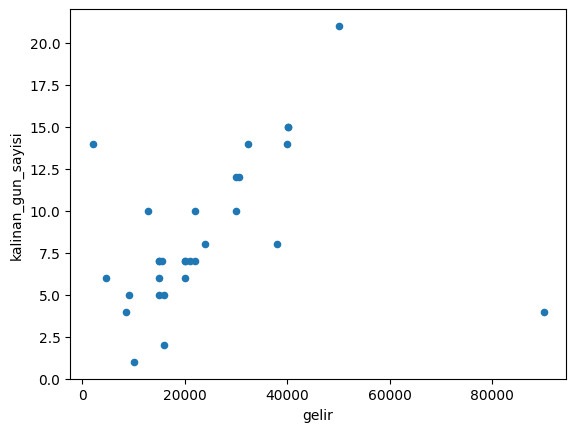

In [144]:
df.plot(kind='scatter', x='gelir', y='kalinan_gun_sayisi')
plt.show()

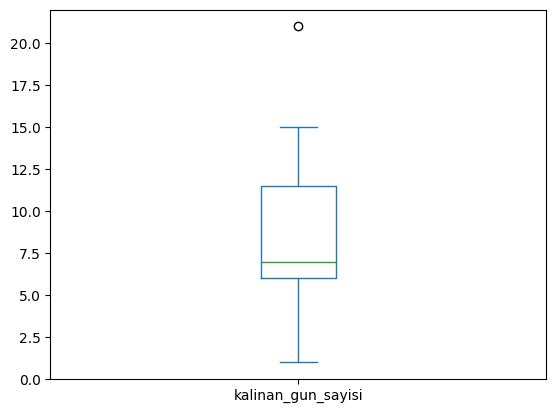

In [145]:
df.plot(kind='box', x='gelir', y='kalinan_gun_sayisi')
plt.show()

In [146]:
print(df['gelir'].corr(df['kalinan_gun_sayisi']))

0.3432225365418049


Yorum: gelir ile kalinan gün arasında zayıf bir ilişki vardır.

lineer regresyon modelinin kurulması:

In [147]:
gelir = pd.DataFrame(df['gelir'])
kalinan_gun_sayisi = pd.DataFrame(df['kalinan_gun_sayisi'])
gelir

,gelir
0,10000
1,90000
2,15000
3,20000
4,40000
5,8500
6,12747
7,30000
8,40050
9,22000


In [148]:
kalinan_gun_sayisi

,kalinan_gun_sayisi
0,1
1,4
2,7
3,7
4,14
5,4
6,10
7,12
8,15
9,10


In [149]:
lm = linear_model.LinearRegression()
model = lm.fit(gelir, kalinan_gun_sayisi)
model.coef_

array([[8.95484382e-05]])

In [150]:
model.intercept_

array([6.37200417])

In [151]:
model.score(gelir, kalinan_gun_sayisi)

0.11780170959019043

In [152]:
#predict new value of kalinan_gun_sayisi
gelir_yeni = {'gelir': [40000]}
gelir_yeni = pd.DataFrame(gelir_yeni)
kalinan_gun_sayisi_tahmini = model.predict(gelir_yeni)
print('Lineer Regresyon: ',kalinan_gun_sayisi_tahmini)

Lineer Regresyon:  [[9.9539417]]


#### lineer regresyon modeline göre misafirin kalacağı gün sayısı 9 olarak tahminlenmiştir.

In [153]:
#predict more values of kalinan_gun_sayisi
A = {'gelir': [23000, 37000, 4000]}
A = pd.DataFrame(A)
B = model.predict(A)
B = pd.DataFrame(B)
df_new = pd.concat([A, B], axis=1, keys=['gelir_yeni', 'kalinan_gun_sayisi_yeni'])
display(df_new)

,gelir_yeni,kalinan_gun_sayisi_yeni
,gelir,0
0,23000,8.431618
1,37000,9.685296
2,4000,6.730198


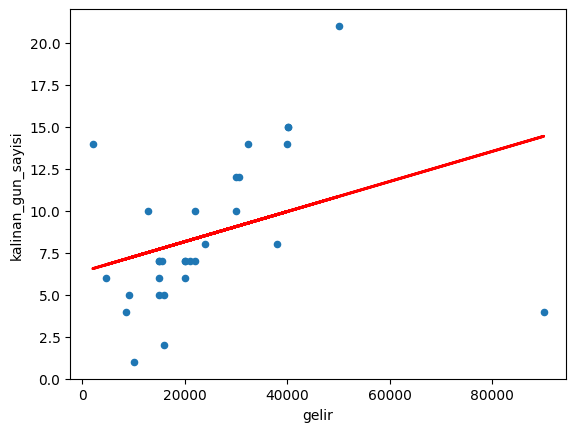

In [154]:
#visualize the result
df.plot(kind='scatter', x='gelir', y='kalinan_gun_sayisi')
#plotting the Regression line
plt.plot(gelir, model.predict(gelir), color='red', linewidth=2)
plt.show()

## Polinomial Regresyon

In [155]:
df=pd.read_csv("/home/buluag/msc/oda_onerisi.csv")
df.head()

,gelir,egitim,evli_bekar,cocuk_sayisi,yas,cinsiyet,mevsim,yerli_yabanci,kalinan_gun_sayisi,oda_tipi
0,10000,lisans,evli,2,35,kadin,yaz,yerli,1,standart
1,90000,lisans,bekar,0,18,erkek,ilkbahar,yerli,4,delux
2,15000,master,evli,1,45,kadin,yaz,yerli,7,suit
3,20000,lise,bekar,0,22,kadin,yaz,yabanci,7,suit
4,40000,lise,evli,2,27,erkek,yaz,yerli,14,suit


In [156]:
gelir = pd.DataFrame(df['gelir'])
kalinan_gun_sayisi = pd.DataFrame(df['kalinan_gun_sayisi'])

# Fitting Linear Regression to the dataset
lin = LinearRegression()
lin.fit(gelir, kalinan_gun_sayisi)

LinearRegression()

In [157]:
# Fitting Polynomial Regression to the dataset
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(gelir)

poly.fit(X_poly, kalinan_gun_sayisi)
lin2 = LinearRegression()
lin2.fit(X_poly, kalinan_gun_sayisi)

LinearRegression()

In [158]:
# Predicting a new result with Linear Regression after converting predict variable to 2D array
gelir = 40000
predarray = np.array([[gelir]])
lin2.predict(poly.fit_transform(predarray))

array([[14.58197663]])

## Random Forest Regression

In [159]:
df=pd.read_csv("/home/buluag/msc/oda_onerisi.csv", header= 0, encoding= 'unicode_escape')

In [160]:
xVal = df.gelir.values.reshape(-1,1)
yVal = df.kalinan_gun_sayisi.values.reshape(-1,1)

rf = RandomForestRegressor(n_estimators=5, random_state=0)
yVal = yVal.ravel()
rf.fit(xVal, yVal)
print('Random Forest regresyon',rf.predict(kalinan_gun_sayisi_tahmini))

Random Forest regresyon [12.4]


#### Random forest regresyon modeline göre ise kalinan gün sayısı tahmini 12'dir.

In [161]:
yhead=rf.predict(xVal)
yhead

array([ 2.4 ,  7.4 ,  6.8 ,  6.5 , 14.2 ,  3.6 ,  8.8 , 11.32, 14.6 ,
        9.46, 19.8 ,  4.  ,  6.8 ,  6.7 ,  5.8 , 12.  , 12.4 ,  8.5 ,
       12.8 ,  6.5 ,  6.5 ,  6.  ,  3.6 , 11.32, 10.6 ,  9.46,  6.8 ,
       14.6 ,  5.8 ,  3.6 ])